In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [2]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [3]:
import datetime
import time

In [4]:
timestamp = []
for d, t in zip(data['Date'], data['Time']):
  try:
    ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
    timestamp.append(time.mktime(ts.timetuple()))
  except ValueError:
    # print('ValueError')
    timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157650342.0
1,1.863,127.352,80.0,5.8,-157485611.0
2,-20.579,-173.972,20.0,6.2,-157375442.0
3,-59.076,-23.557,15.0,5.8,-157113617.0
4,11.938,126.427,15.0,5.8,-157046230.0


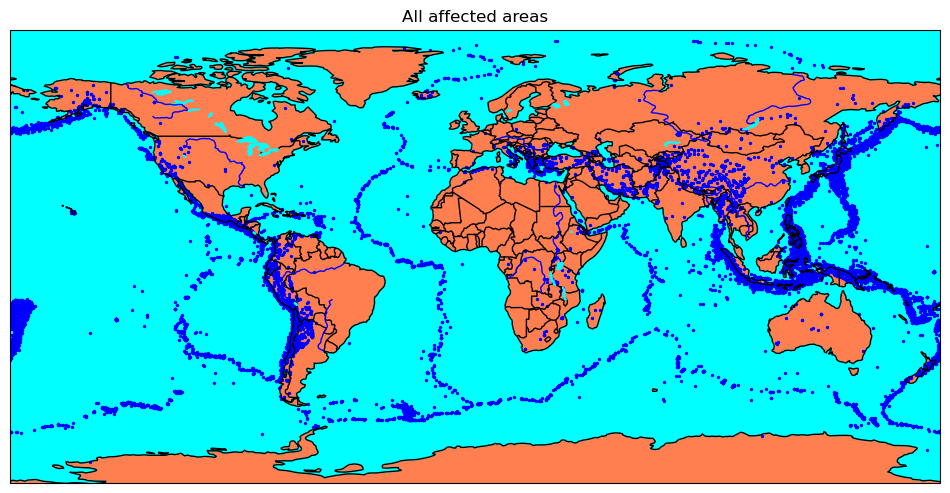

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming `data` is your DataFrame with longitude and latitude columns

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_title("All affected areas")

ax.scatter(data["Longitude"], data["Latitude"], s=2, color='blue', transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='coral')
ax.add_feature(cfeature.OCEAN, color='aqua')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(cfeature.LAKES, color='aqua')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

plt.show()


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you've already loaded and preprocessed your data
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shapes of training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shapes of training and testing sets:
X_train shape: (18727, 3)
X_test shape: (4682, 3)
y_train shape: (18727, 2)
y_test shape: (4682, 2)


In [12]:
from keras.models import Sequential
from keras.layers import Dense


In [13]:
def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [14]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [15]:
from scikeras.wrappers import KerasClassifier  # Import from scikeras

model = KerasClassifier(build_fn=create_model, verbose=0)

# Hyperparameters (replace with your desired values)
neurons = [16]
batch_size = [10]
epochs = [10]
activation = ['sigmoid', 'relu']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

In [16]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: Invalid parameter activation for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(activation=sigmoid)`
Check the list of available parameters with `estimator.get_params().keys()`

In [17]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

/Users/ananyasirandass/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-10 12:02:11.259533: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-10 12:02:11.259594: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-10 12:02:11.259604: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-10 12:02:11.259853: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-10 12:02:11.259890: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Cr

Epoch 1/20


2024-04-10 12:02:12.096355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1873/1873 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9201 - loss: 0.5036 - val_accuracy: 0.9242 - val_loss: 0.5038
Epoch 2/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9142 - loss: 0.5041 - val_accuracy: 0.9242 - val_loss: 0.5038
Epoch 3/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9166 - loss: 0.5046 - val_accuracy: 0.9242 - val_loss: 0.5038
Epoch 4/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9165 - loss: 0.5044 - val_accuracy: 0.9242 - val_loss: 0.5038
Epoch 5/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9201 - loss: 0.5036 - val_accuracy: 0.9242 - val_loss: 0.5038
Epoch 6/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9177 - loss: 0.5035 - val_accuracy: 0.9242 - val_loss: 0.5038
Epoch 7/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9229 - loss: 0.5030 - val_accuracy: 0.9242 - val_loss: 0.5038
Epoch 8/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9185 - loss: 0.5040 - val_accura